In [1]:
import numpy as np # https://numpy.org/
import pandas as pd # https://pandas.pydata.org/
import seaborn as sns # https://seaborn.pydata.org/
import matplotlib.pyplot as plt # https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.html
%matplotlib inline

In [2]:
df = pd.read_csv('precio_prep_reg.csv', header = 0) # Leer el archivo generado en el notebook de preproceso

In [3]:
X_multiple = df.drop('precio', axis = 1) # Crear un nuevo dataframe sin la columna precio (axis=1 -> borra columna)

In [4]:
y_multiple = df['precio']

In [5]:
from sklearn.linear_model import LinearRegression # Importar el modulo y la función necesaria para el modelo de regresión lineal


# División de los datos en set de entrenamiento y validación

In [6]:
from sklearn.model_selection import train_test_split # Importar modulo y función necesaria para hacer una división
# aleatoria de los datos

In [7]:
X_train, X_test, y_train, y_test = train_test_split(X_multiple, y_multiple, test_size = 0.2, random_state = 123) # Obtener los cuatro
# conjuntos de datos necesarios para el modelo

In [8]:
X_train.shape, X_test.shape, y_test.shape, y_train.shape # Revisar las dimensiones de las matrices de los dataframes generados

((404, 16), (102, 16), (102,), (404,))

In [9]:
linear_model_s = LinearRegression()

In [10]:
linear_model_s.fit(X_train, y_train)

LinearRegression()

In [11]:
y_train_s = linear_model_s.predict(X_train) # Realizar la predicción en el conjunto de entrenamiento

In [12]:
y_test_s = linear_model_s.predict(X_test) # Realizar la predicción en el conjunto de validación

In [13]:
from sklearn.metrics import r2_score # Importar la función que realiza el calculo del coeficiente de determinación

In [14]:
r2_score?

Signature:
r2_score(
    y_true,
    y_pred,
    *,
    sample_weight=None,
    multioutput='uniform_average',
)
Docstring:
R^2 (coefficient of determination) regression score function.

Best possible score is 1.0 and it can be negative (because the
model can be arbitrarily worse). A constant model that always
predicts the expected value of y, disregarding the input features,
would get a R^2 score of 0.0.

Read more in the :ref:`User Guide <r2_score>`.

Parameters
----------
y_true : array-like of shape (n_samples,) or (n_samples, n_outputs)
    Ground truth (correct) target values.

y_pred : array-like of shape (n_samples,) or (n_samples, n_outputs)
    Estimated target values.

sample_weight : array-like of shape (n_samples,), default=None
    Sample weights.

multioutput : {'raw_values', 'uniform_average', 'variance_weighted'},             array-like of shape (n_outputs,) or None, default='uniform_average'

    Defines aggregating of multiple output scores.
    Array-like value defi

In [15]:
r2_score(y_train, y_train_s) # Ver la bondad de ajuste en los datos de entrenamiento

0.747689691306311

In [16]:
r2_score(y_test, y_test_s) # Ver la bondad de ajuste en los datos de validación

0.5957731490588167

# Regularización por el método Ridge
Este método penaliza la sumatoria de los parámetros elevados al cuadrado, reduce proporcionalmente los valores de los parámetros del modelo sin que jamás alcancen el valor de cero. El grado de penalización se controla por un hiperparámetro $\lambda$, cuado este es igual a cero no hay penalización al modelo y es equivalente a aplicar el modelo de regresión tradicional, a mayor $\lambda$ la penalización aumenta y disminuyen los valores de los predictores.

$\sum_{i=1}^{n}(y_{i}-\theta_{0}-\sum_{j=1}^p\theta_{j}x_{ij})+\lambda\sum_{j=1}^p\theta_{j}^2$

In [17]:
from sklearn import preprocessing # Importar el modulo de preproceso

In [18]:
escala = preprocessing.StandardScaler().fit(X_train) # Crea un modelo para la normalización de los datos de X_train

In [19]:
X_train_esc = escala.transform(X_train) # Escalar (normlizar) el conjunto de datos de entrenamiento

In [20]:
X_train_esc

array([[-0.7563966 , -1.2260954 , -1.19901595, ..., -0.5007734 ,
        -0.38435306, -0.76440416],
       [ 1.55145024,  0.99548171,  1.58732869, ..., -0.5007734 ,
         2.60177454, -0.76440416],
       [-0.66185639, -1.02871793, -0.39124269, ..., -0.5007734 ,
        -0.38435306,  1.30820847],
       ...,
       [-0.49338271, -0.548961  , -0.53748492, ..., -0.5007734 ,
        -0.38435306, -0.76440416],
       [ 1.50072639,  0.99548171,  1.24322932, ..., -0.5007734 ,
        -0.38435306,  1.30820847],
       [ 0.90228673,  0.99548171,  1.39807403, ..., -0.5007734 ,
        -0.38435306,  1.30820847]])

In [21]:
X_test_esc = escala.transform(X_test) # Escalar el conjunto de datos de validación

In [22]:
X_test_esc

array([[ 3.11240444,  0.99548171,  0.35717344, ..., -0.5007734 ,
        -0.38435306,  1.30820847],
       [-0.73540318, -0.96532662, -0.91599422, ..., -0.5007734 ,
        -0.38435306,  1.30820847],
       [-0.75574835, -1.13244915, -0.96846938, ..., -0.5007734 ,
        -0.38435306, -0.76440416],
       ...,
       [-0.75163044, -1.39321793, -1.30310601, ..., -0.5007734 ,
         2.60177454, -0.76440416],
       [-0.76018979, -0.97973374, -0.97621161, ...,  1.9969112 ,
        -0.38435306, -0.76440416],
       [ 0.87826202,  0.99548171,  0.24534115, ..., -0.5007734 ,
         2.60177454, -0.76440416]])

In [23]:
from sklearn.linear_model import Ridge #Importar el modelo Ridge

In [24]:
linear_model_r = Ridge(alpha = 0.5)
linear_model_r.fit(X_train_esc, y_train)

Ridge(alpha=0.5)

In [25]:
r2_score(y_test, linear_model_r.predict(X_test_esc)) # Calcular r2 en el conjunto de validación

0.5956947285362598

In [26]:
from sklearn.model_selection import validation_curve # Importar el modulo que permite determinar las puntuaciones para diferentes valores de parámetros

In [27]:
validation_curve?

Signature:
validation_curve(
    estimator,
    X,
    y,
    *,
    param_name,
    param_range,
    groups=None,
    cv=None,
    scoring=None,
    n_jobs=None,
    pre_dispatch='all',
    verbose=0,
    error_score=nan,
    fit_params=None,
)
Docstring:
Validation curve.

Determine training and test scores for varying parameter values.

Compute scores for an estimator with different values of a specified
parameter. This is similar to grid search with one parameter. However, this
will also compute training scores and is merely a utility for plotting the
results.

Read more in the :ref:`User Guide <validation_curve>`.

Parameters
----------
estimator : object type that implements the "fit" and "predict" methods
    An object of that type which is cloned for each validation.

X : array-like of shape (n_samples, n_features)
    Training vector, where n_samples is the number of samples and
    n_features is the number of features.

y : array-like of shape (n_samples,) or (n_samples, n_ou

In [28]:
rango_parametros = np.logspace(-2,8,100) # Retorna 100 números espaciados entre -2 y 8 en una escala logaritmica

In [29]:
rango_parametros

array([1.00000000e-02, 1.26185688e-02, 1.59228279e-02, 2.00923300e-02,
       2.53536449e-02, 3.19926714e-02, 4.03701726e-02, 5.09413801e-02,
       6.42807312e-02, 8.11130831e-02, 1.02353102e-01, 1.29154967e-01,
       1.62975083e-01, 2.05651231e-01, 2.59502421e-01, 3.27454916e-01,
       4.13201240e-01, 5.21400829e-01, 6.57933225e-01, 8.30217568e-01,
       1.04761575e+00, 1.32194115e+00, 1.66810054e+00, 2.10490414e+00,
       2.65608778e+00, 3.35160265e+00, 4.22924287e+00, 5.33669923e+00,
       6.73415066e+00, 8.49753436e+00, 1.07226722e+01, 1.35304777e+01,
       1.70735265e+01, 2.15443469e+01, 2.71858824e+01, 3.43046929e+01,
       4.32876128e+01, 5.46227722e+01, 6.89261210e+01, 8.69749003e+01,
       1.09749877e+02, 1.38488637e+02, 1.74752840e+02, 2.20513074e+02,
       2.78255940e+02, 3.51119173e+02, 4.43062146e+02, 5.59081018e+02,
       7.05480231e+02, 8.90215085e+02, 1.12332403e+03, 1.41747416e+03,
       1.78864953e+03, 2.25701972e+03, 2.84803587e+03, 3.59381366e+03,
      

In [30]:
train_scores, test_scores = validation_curve(Ridge(), X_train_esc, y_train, "alpha", rango_parametros, scoring = "r2") # Determinar puntuaciones para entrenamiento
# y validación para el parámetro lambda (alpha en Python) para los métodos de regularización

d:\jasdata\python39\lib\site-packages\sklearn\utils\validation.py:70: FutureWarning: Pass param_name=alpha, param_range=[1.00000000e-02 1.26185688e-02 1.59228279e-02 2.00923300e-02
 2.53536449e-02 3.19926714e-02 4.03701726e-02 5.09413801e-02
 6.42807312e-02 8.11130831e-02 1.02353102e-01 1.29154967e-01
 1.62975083e-01 2.05651231e-01 2.59502421e-01 3.27454916e-01
 4.13201240e-01 5.21400829e-01 6.57933225e-01 8.30217568e-01
 1.04761575e+00 1.32194115e+00 1.66810054e+00 2.10490414e+00
 2.65608778e+00 3.35160265e+00 4.22924287e+00 5.33669923e+00
 6.73415066e+00 8.49753436e+00 1.07226722e+01 1.35304777e+01
 1.70735265e+01 2.15443469e+01 2.71858824e+01 3.43046929e+01
 4.32876128e+01 5.46227722e+01 6.89261210e+01 8.69749003e+01
 1.09749877e+02 1.38488637e+02 1.74752840e+02 2.20513074e+02
 2.78255940e+02 3.51119173e+02 4.43062146e+02 5.59081018e+02
 7.05480231e+02 8.90215085e+02 1.12332403e+03 1.41747416e+03
 1.78864953e+03 2.25701972e+03 2.84803587e+03 3.59381366e+03
 4.53487851e+03 5.72236766

In [31]:
print(train_scores)
print(test_scores)

[[7.54684583e-01 7.29865420e-01 7.38992758e-01 7.53288483e-01
  7.72179999e-01]
 [7.54684583e-01 7.29865419e-01 7.38992757e-01 7.53288482e-01
  7.72179998e-01]
 [7.54684582e-01 7.29865418e-01 7.38992757e-01 7.53288481e-01
  7.72179997e-01]
 [7.54684581e-01 7.29865416e-01 7.38992755e-01 7.53288479e-01
  7.72179995e-01]
 [7.54684579e-01 7.29865414e-01 7.38992753e-01 7.53288475e-01
  7.72179993e-01]
 [7.54684576e-01 7.29865410e-01 7.38992750e-01 7.53288470e-01
  7.72179989e-01]
 [7.54684572e-01 7.29865403e-01 7.38992745e-01 7.53288462e-01
  7.72179983e-01]
 [7.54684564e-01 7.29865393e-01 7.38992737e-01 7.53288448e-01
  7.72179972e-01]
 [7.54684552e-01 7.29865376e-01 7.38992724e-01 7.53288426e-01
  7.72179956e-01]
 [7.54684534e-01 7.29865350e-01 7.38992703e-01 7.53288392e-01
  7.72179931e-01]
 [7.54684504e-01 7.29865308e-01 7.38992670e-01 7.53288337e-01
  7.72179890e-01]
 [7.54684457e-01 7.29865241e-01 7.38992617e-01 7.53288251e-01
  7.72179825e-01]
 [7.54684382e-01 7.29865135e-01 7.389925

In [32]:
train_media = np.mean(train_scores, axis = 1) # Media de las puntuaciones de entrenamiento

In [33]:
test_media = np.mean(test_scores, axis = 1) # Media de las puntuaciones de validación

In [34]:
train_media

array([7.49802249e-01, 7.49802248e-01, 7.49802247e-01, 7.49802245e-01,
       7.49802243e-01, 7.49802239e-01, 7.49802233e-01, 7.49802223e-01,
       7.49802207e-01, 7.49802182e-01, 7.49802142e-01, 7.49802078e-01,
       7.49801977e-01, 7.49801816e-01, 7.49801561e-01, 7.49801157e-01,
       7.49800517e-01, 7.49799504e-01, 7.49797905e-01, 7.49795386e-01,
       7.49791426e-01, 7.49785223e-01, 7.49775540e-01, 7.49760495e-01,
       7.49737243e-01, 7.49701529e-01, 7.49647063e-01, 7.49564654e-01,
       7.49441046e-01, 7.49257333e-01, 7.48986866e-01, 7.48592449e-01,
       7.48022673e-01, 7.47207173e-01, 7.46050744e-01, 7.44426338e-01,
       7.42167263e-01, 7.39059165e-01, 7.34832921e-01, 7.29160396e-01,
       7.21656252e-01, 7.11890070e-01, 6.99412866e-01, 6.83799248e-01,
       6.64700711e-01, 6.41898627e-01, 6.15341743e-01, 5.85156515e-01,
       5.51629977e-01, 5.15178217e-01, 4.76319756e-01, 4.35666225e-01,
       3.93926254e-01, 3.51903969e-01, 3.10471862e-01, 2.70510879e-01,
      

In [35]:
test_media

array([ 7.22678872e-01,  7.22679555e-01,  7.22680417e-01,  7.22681504e-01,
        7.22682876e-01,  7.22684604e-01,  7.22686784e-01,  7.22689530e-01,
        7.22692991e-01,  7.22697349e-01,  7.22702834e-01,  7.22709733e-01,
        7.22718404e-01,  7.22729290e-01,  7.22742940e-01,  7.22760025e-01,
        7.22781365e-01,  7.22807950e-01,  7.22840955e-01,  7.22881758e-01,
        7.22931928e-01,  7.22993192e-01,  7.23067352e-01,  7.23156120e-01,
        7.23260842e-01,  7.23382057e-01,  7.23518823e-01,  7.23667744e-01,
        7.23821605e-01,  7.23967505e-01,  7.24084370e-01,  7.24139700e-01,
        7.24085396e-01,  7.23852528e-01,  7.23345026e-01,  7.22432398e-01,
        7.20941835e-01,  7.18650310e-01,  7.15277800e-01,  7.10483573e-01,
        7.03868776e-01,  6.94989710e-01,  6.83385958e-01,  6.68624514e-01,
        6.50354836e-01,  6.28362463e-01,  6.02605157e-01,  5.73219736e-01,
        5.40500232e-01,  5.04862199e-01,  4.66814202e-01,  4.26949715e-01,
        3.85954913e-01,  

In [36]:
max(test_media) # Ver el valor máximo de las medias de las puntuaciones de validación

0.7241397002691519

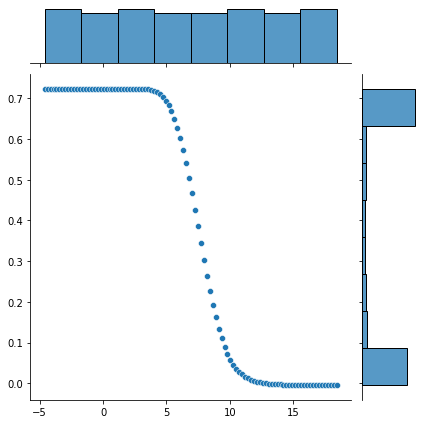

In [37]:
sns.jointplot(x = np.log(rango_parametros), y = test_media) # Realizar la gráfica del rango de parámetros vs la media de las puntuaciones de validación (alpha)

In [38]:
np.where(test_media==max(test_media)) # Conocer el índice de la puntuación máxima de validación para determinar su correspondiente
# valor de alpha

(array([31], dtype=int64),)

In [39]:
rango_parametros[31] # Valor de alpha

13.530477745798061

In [40]:
best_linear_model_r = Ridge(alpha = rango_parametros[31]) #Aplicar el valor de alfa que desarrolla el mejor modelo lineal basado en Ridge

In [41]:
best_linear_model_r.fit(X_train_esc, y_train)

Ridge(alpha=13.530477745798061)

In [42]:
r2_score(y_test, best_linear_model_r.predict(X_test_esc))

0.5949456586148061

In [43]:
r2_score(y_train, best_linear_model_r.predict(X_train_esc))

0.7468844401944872

# Regularización por el método Lasso
Este método penaliza la sumatoria de los valores absolutos de los parámetros elevados al cuadrado, forza a que los parámetros tiendan a cero. El grado de penalización se controla por un hiperparámetro $\lambda$, cuado este es igual a cero no hay penalización al modelo y es equivalente a aplicar el modelo de regresión tradicional, a mayor $\lambda$ la penalización aumenta y se excluyen predictores.

$\sum_{i=1}^{n}(y_{i}-\theta_{0}-\sum_{j=1}^p\theta_{j}x_{ij})+\lambda\sum_{j=1}^p\|\theta_{j}\|$

In [44]:
from sklearn.linear_model import Lasso

In [45]:
linear_model_l = Lasso(alpha = 0.5)

In [46]:
linear_model_l.fit(X_train_esc, y_train)

Lasso(alpha=0.5)

In [47]:
r2_score(y_test, linear_model_l.predict(X_test_esc))

0.5624540297682838

In [48]:
train_scores_l, test_scores_l = validation_curve(Lasso(), X_train_esc, y_train, "alpha", rango_parametros, scoring = "r2")

d:\jasdata\python39\lib\site-packages\sklearn\utils\validation.py:70: FutureWarning: Pass param_name=alpha, param_range=[1.00000000e-02 1.26185688e-02 1.59228279e-02 2.00923300e-02
 2.53536449e-02 3.19926714e-02 4.03701726e-02 5.09413801e-02
 6.42807312e-02 8.11130831e-02 1.02353102e-01 1.29154967e-01
 1.62975083e-01 2.05651231e-01 2.59502421e-01 3.27454916e-01
 4.13201240e-01 5.21400829e-01 6.57933225e-01 8.30217568e-01
 1.04761575e+00 1.32194115e+00 1.66810054e+00 2.10490414e+00
 2.65608778e+00 3.35160265e+00 4.22924287e+00 5.33669923e+00
 6.73415066e+00 8.49753436e+00 1.07226722e+01 1.35304777e+01
 1.70735265e+01 2.15443469e+01 2.71858824e+01 3.43046929e+01
 4.32876128e+01 5.46227722e+01 6.89261210e+01 8.69749003e+01
 1.09749877e+02 1.38488637e+02 1.74752840e+02 2.20513074e+02
 2.78255940e+02 3.51119173e+02 4.43062146e+02 5.59081018e+02
 7.05480231e+02 8.90215085e+02 1.12332403e+03 1.41747416e+03
 1.78864953e+03 2.25701972e+03 2.84803587e+03 3.59381366e+03
 4.53487851e+03 5.72236766

In [49]:
print(train_scores_l)
print(test_scores_l)

[[0.7546516  0.72980448 0.73895906 0.75322448 0.77213088]
 [0.75463198 0.72977081 0.73893904 0.75318938 0.77210441]
 [0.75460071 0.7297255  0.73890712 0.75313391 0.77206451]
 [0.75455059 0.72965326 0.73886244 0.75304699 0.77200103]
 [0.75448896 0.72953815 0.73879784 0.75294593 0.77190056]
 [0.75439712 0.72938163 0.73869504 0.75284269 0.77175599]
 [0.75425098 0.72924494 0.73853363 0.75267716 0.77159963]
 [0.7540406  0.72902589 0.73827691 0.75242142 0.77140285]
 [0.7537101  0.72867664 0.73786821 0.75218214 0.77108962]
 [0.75318392 0.72812158 0.73725197 0.75181289 0.77059103]
 [0.7523465  0.72730759 0.7363389  0.75122442 0.76989054]
 [0.75119558 0.7261352  0.73494525 0.75028982 0.76880633]
 [0.7497084  0.72453956 0.73315432 0.74880245 0.7670785 ]
 [0.74759175 0.72210756 0.73030271 0.74654476 0.76467488]
 [0.74429861 0.71838391 0.72647798 0.74317088 0.76123317]
 [0.73915336 0.71285075 0.72106831 0.73796143 0.75576272]
 [0.73382982 0.70501293 0.71247369 0.73001319 0.74846793]
 [0.72643692 0

In [50]:
train_media_l = np.mean(train_scores_l, axis = 1)

In [51]:
test_media_l = np.mean(test_scores_l, axis = 1)

In [52]:
train_media_l

array([0.7497541 , 0.74972712, 0.74968635, 0.74962286, 0.74953429,
       0.74941449, 0.74926127, 0.74903353, 0.74870534, 0.74819228,
       0.74742159, 0.74627443, 0.74465665, 0.74224433, 0.73871291,
       0.73335931, 0.72595951, 0.71710917, 0.70846557, 0.70054607,
       0.69149544, 0.67902332, 0.65916303, 0.62754068, 0.57830839,
       0.51144273, 0.41124359, 0.25345836, 0.03784887, 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.     

In [53]:
test_media_l

array([ 0.72397237,  0.72427629,  0.72464248,  0.72508448,  0.72553203,
        0.72600656,  0.72649384,  0.72705998,  0.72756263,  0.72808207,
        0.72848947,  0.7286862 ,  0.72840453,  0.72755468,  0.72509244,
        0.72051255,  0.71444405,  0.70661008,  0.69876205,  0.69192199,
        0.6839456 ,  0.67156844,  0.65171416,  0.61991746,  0.57047921,
        0.50619506,  0.40708813,  0.24857275,  0.03327926, -0.00441247,
       -0.00441247, -0.00441247, -0.00441247, -0.00441247, -0.00441247,
       -0.00441247, -0.00441247, -0.00441247, -0.00441247, -0.00441247,
       -0.00441247, -0.00441247, -0.00441247, -0.00441247, -0.00441247,
       -0.00441247, -0.00441247, -0.00441247, -0.00441247, -0.00441247,
       -0.00441247, -0.00441247, -0.00441247, -0.00441247, -0.00441247,
       -0.00441247, -0.00441247, -0.00441247, -0.00441247, -0.00441247,
       -0.00441247, -0.00441247, -0.00441247, -0.00441247, -0.00441247,
       -0.00441247, -0.00441247, -0.00441247, -0.00441247, -0.00

In [54]:
max(test_media_l)

0.7286862023760963

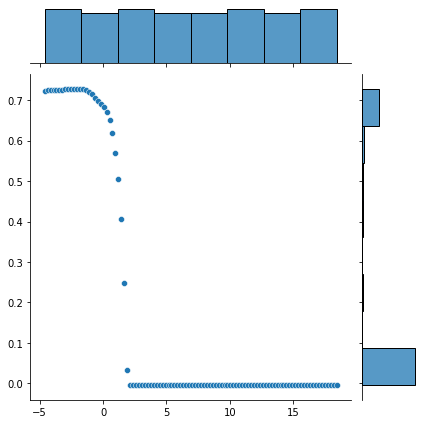

In [55]:
sns.jointplot(x = np.log(rango_parametros), y = test_media_l)

In [56]:
np.where(test_media_l==max(test_media_l))

(array([11], dtype=int64),)

In [57]:
rango_parametros[11]

0.1291549665014884

In [58]:
best_linear_model_l = Lasso(alpha = rango_parametros[11])

In [59]:
best_linear_model_l.fit(X_train_esc, y_train)

Lasso(alpha=0.1291549665014884)

In [60]:
r2_score(y_test, best_linear_model_l.predict(X_test_esc))

0.5873227619767589

In [61]:
r2_score(y_train, best_linear_model_l.predict(X_train_esc))

0.7446953523241677